In [76]:
import pandas as pd
df = pd.read_csv("../Data/Cleaned_Customer_Data.csv")
df.head()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_ID,...,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason
0,35,7,27,65.6,593.30,0.00,0,381.51,974.81,19877-DEL,...,Yes,No,No,Yes,One Year,Yes,Credit Card,Stayed,Unknown,Unknown
1,45,14,13,4.0,542.40,38.33,10,96.21,610.28,58353-MAH,...,No,Yes,Yes,No,Month-to-Month,No,Credit Card,Stayed,Unknown,Unknown
2,51,4,35,73.9,280.85,0.00,0,134.60,415.45,25063-WES,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Competitor,Competitor had better devices
3,79,3,21,98.0,1237.85,0.00,0,361.66,1599.51,59787-KAR,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned,Dissatisfaction,Product dissatisfaction
4,80,3,8,83.9,267.40,0.00,0,22.14,289.54,28544-TAM,...,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned,Dissatisfaction,Network reliability


In [77]:
# Filter the data

df1 = df[df["Customer_Status"]!="Joined"]
df2 = df[df["Customer_Status"]=="Joined"]

In [78]:
df1["Customer_Status"].unique()

array(['Stayed', 'Churned'], dtype=object)

In [79]:
df2["Customer_Status"].unique()

array(['Joined'], dtype=object)

In [80]:
df1.to_csv("../Data/train_data.csv")
df2.to_csv("../Data/prediction_data.csv")

In [81]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6007 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6007 non-null   int64  
 1   Number_of_Referrals          6007 non-null   int64  
 2   Tenure_in_Months             6007 non-null   int64  
 3   Monthly_Charge               6007 non-null   float64
 4   Total_Charges                6007 non-null   float64
 5   Total_Refunds                6007 non-null   float64
 6   Total_Extra_Data_Charges     6007 non-null   int64  
 7   Total_Long_Distance_Charges  6007 non-null   float64
 8   Total_Revenue                6007 non-null   float64
 9   Customer_ID                  6007 non-null   object 
 10  Gender                       6007 non-null   object 
 11  Married                      6007 non-null   object 
 12  State                        6007 non-null   object 
 13  Value_Deal             

In [82]:
print(df1.describe())

               Age  Number_of_Referrals  Tenure_in_Months  Monthly_Charge  \
count  6007.000000          6007.000000        6007.00000     6007.000000   
mean     47.289163             7.439820          17.39454       65.275379   
std      16.805110             4.622369          10.59292       30.671240   
min      18.000000             0.000000           1.00000        1.000000   
25%      33.000000             3.000000           8.00000       35.950000   
50%      47.000000             7.000000          17.00000       71.100000   
75%      60.000000            11.000000          27.00000       90.450000   
max      84.000000            15.000000          36.00000      118.750000   

       Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
count    6007.000000    6007.000000               6007.000000   
mean     2430.986173       2.038612                  7.015149   
std      2267.481294       8.065520                 25.405737   
min        19.100000       0.000000           

## Exploratory Data Analysis (EDA)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Check for missing values
print(df1.isnull().sum())

Age                            0
Number_of_Referrals            0
Tenure_in_Months               0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_ID                    0
Gender                         0
Married                        0
State                          0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Customer_Status                0
Churn_Cate

The is obviously no missing data

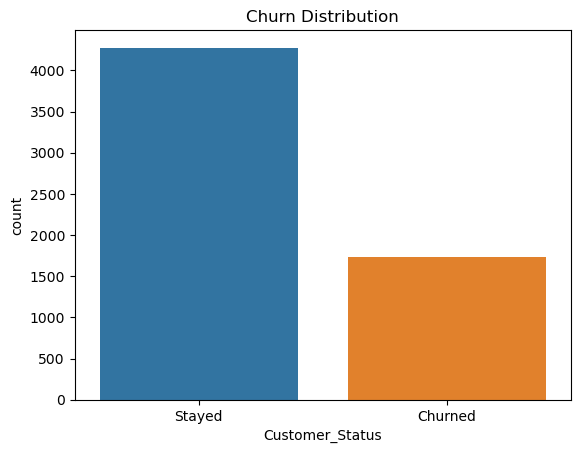

In [85]:
# Check the distribution of the target variable
sns.countplot(x='Customer_Status', data=df1)
plt.title('Churn Distribution')
plt.show()

The data seem to be imbalanced

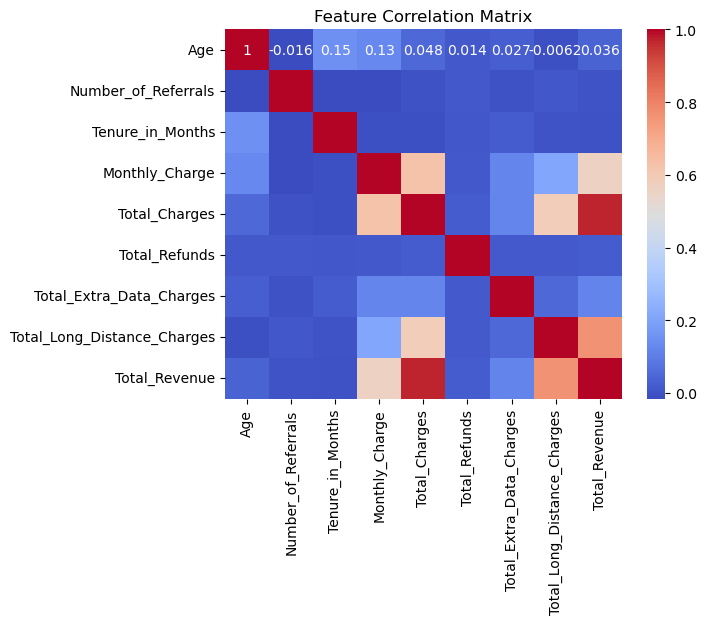

In [86]:
numerical_features = df1.select_dtypes(include=[np.number]).columns
# Visualize correlations for numerical features
correlation_matrix = df1[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

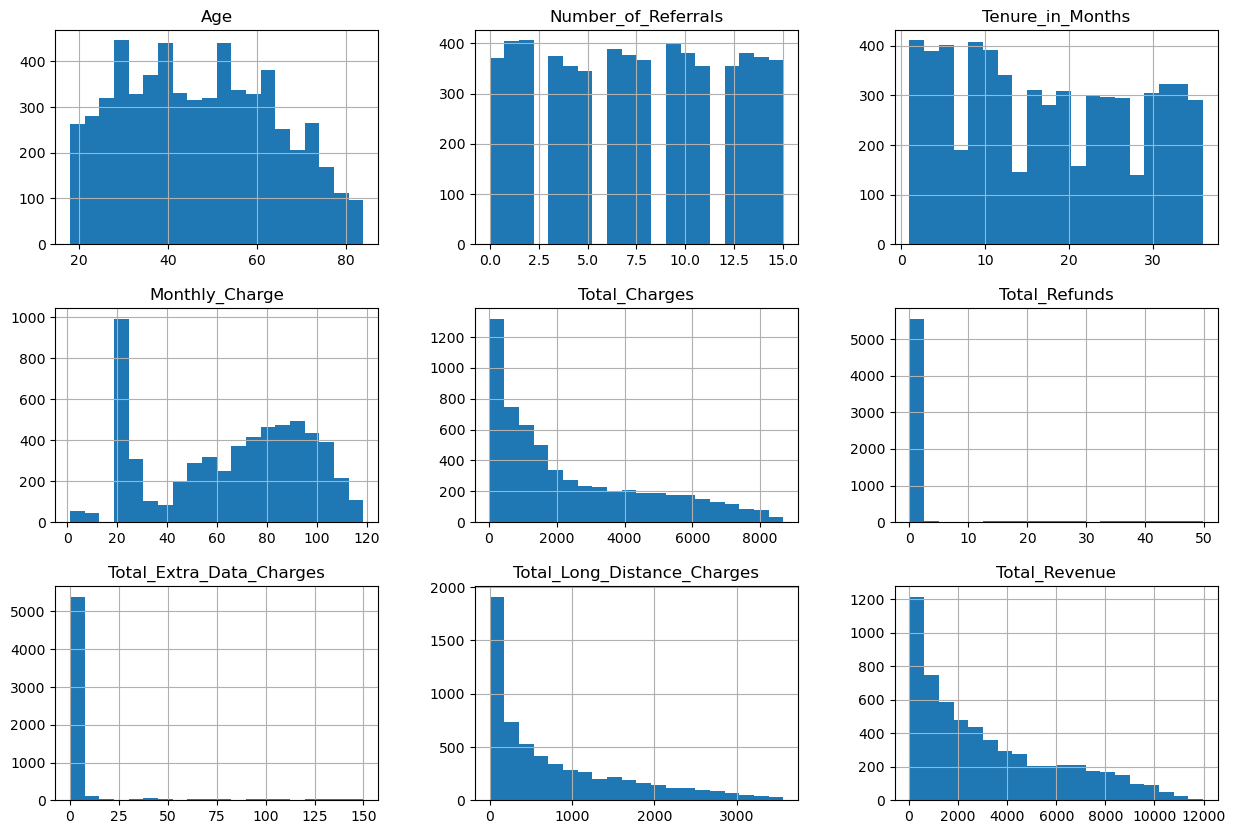

In [87]:
# Distribution of numerical features
df1.hist(bins=20, figsize=(15, 10))
plt.show()

## Encode categorical variables

In [88]:
categorical_features = df1.select_dtypes(include=[object]).columns
categorical_features = [string for string in categorical_features if string != "Customer_Status"]

from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le

C:\Users\noefo\AppData\Local\Temp\ipykernel_63856\608000372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = le.fit_transform(df1[column])
C:\Users\noefo\AppData\Local\Temp\ipykernel_63856\608000372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = le.fit_transform(df1[column])
C:\Users\noefo\AppData\Local\Temp\ipykernel_63856\608000372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [89]:
df1['Customer_Status'] = df1['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

C:\Users\noefo\AppData\Local\Temp\ipykernel_63856\1655268638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Customer_Status'] = df1['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [90]:
df1.head()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_ID,...,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason
0,35,7,27,65.6,593.30,0.00,0,381.51,974.81,640,...,2,0,0,2,1,1,1,0,5,20
1,45,14,13,4.0,542.40,38.33,10,96.21,610.28,3202,...,0,2,2,0,0,0,1,0,5,20
2,51,4,35,73.9,280.85,0.00,0,134.60,415.45,949,...,0,0,0,2,0,1,0,1,1,2
3,79,3,21,98.0,1237.85,0.00,0,361.66,1599.51,3325,...,2,2,0,2,0,1,0,1,2,18
4,80,3,8,83.9,267.40,0.00,0,22.14,289.54,1183,...,2,0,0,2,0,1,1,1,2,14


## Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

C:\Users\noefo\AppData\Local\Temp\ipykernel_63856\339337534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numerical_features] = scaler.fit_transform(df1[numerical_features])


## Model Building

In [92]:
# Split the data
df1 = df1.dropna()
from sklearn.model_selection import train_test_split

X = df1.drop('Customer_Status', axis=1)
y = df1['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Models
Try several models and choose the best one:

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

In [94]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Model Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Evaluate each model
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

Logistic Regression Model Evaluation
Accuracy: 0.9866888519134775
Confusion Matrix:
 [[839   2]
 [ 14 347]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       841
           1       0.99      0.96      0.98       361

    accuracy                           0.99      1202
   macro avg       0.99      0.98      0.98      1202
weighted avg       0.99      0.99      0.99      1202

--------------------------------------------------
Decision Tree Model Evaluation
Accuracy: 1.0
Confusion Matrix:
 [[841   0]
 [  0 361]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       361

    accuracy                           1.00      1202
   macro avg       1.00      1.00      1.00      1202
weighted avg       1.00      1.00      1.00      1202

--------------------------------------------------
R

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision trees and random forest provide the best predictions with 100 percent accuracy

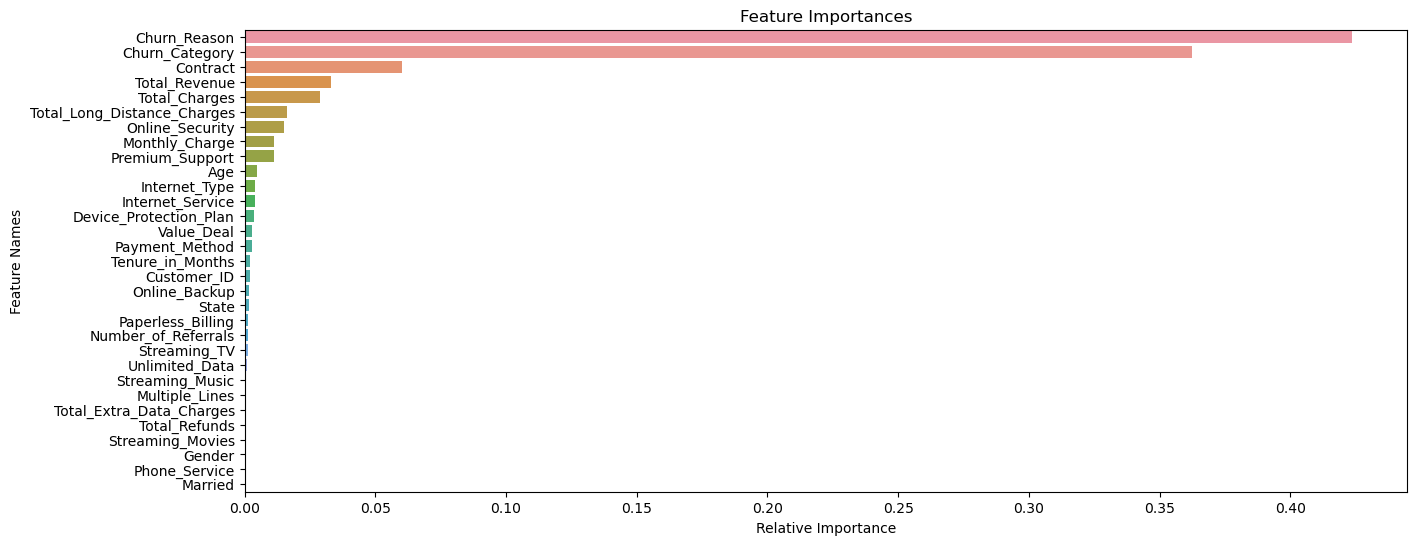

In [108]:
# Feature Selection using Feature Importance
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

## Save the parameters of both models

In [95]:
import joblib

# Save the model
joblib.dump(forest_model, 'forest_model.pkl')

['forest_model.pkl']

## Use the saved models to make predictions on the prediction data

In [96]:
# Load the model for prediction
loaded_model2 = joblib.load('forest_model.pkl')

In [97]:
# Example prediction
pred_data = pd.read_csv("../Data/prediction_data.csv",index_col=0)
#sample_data = pred_data.values.reshape(1, -1)

In [98]:
categorical_features = pred_data.select_dtypes(include=[object]).columns
categorical_features = [string for string in categorical_features if string != "Customer_Status"]
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    pred_data[column] = le.fit_transform(pred_data[column])
    label_encoders[column] = le

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pred_data[numerical_features] = scaler.fit_transform(pred_data[numerical_features])

In [100]:
# Split the data
from sklearn.model_selection import train_test_split

pred_data = pred_data.dropna()

X = pred_data.drop('Customer_Status', axis=1)
y = pred_data['Customer_Status']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)

In [101]:
# prediction1 = loaded_model1.predict(X)
prediction2 = loaded_model2.predict(X)

In [104]:
len(pred_data)

411

In [105]:
pred_data = pd.read_csv("../Data/prediction_data.csv",index_col=0)
pred_data["Predictions"] = prediction2
pred_data.head()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_ID,...,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Customer_Status,Churn_Category,Churn_Reason,Predictions
17,67,13,19,72.10,72.1,0.0,0,7.77,79.87,93520-GUJ,...,No,No,Yes,One Year,Yes,Bank Withdrawal,Joined,Unknown,Unknown,1
23,18,9,7,19.85,57.2,0.0,0,9.36,66.56,57256-BIH,...,Unknown,Unknown,Unknown,Month-to-Month,No,Credit Card,Joined,Unknown,Unknown,1
48,53,14,12,44.30,44.3,0.0,0,42.95,87.25,72357-MAD,...,No,No,Yes,Month-to-Month,Yes,Credit Card,Joined,Unknown,Unknown,1
98,58,11,18,19.95,58.0,0.0,0,8.07,66.07,66612-KAR,...,Unknown,Unknown,Unknown,Month-to-Month,No,Credit Card,Joined,Unknown,Unknown,1
104,31,5,5,20.05,33.7,0.0,0,3.62,37.32,22119-WES,...,Unknown,Unknown,Unknown,Month-to-Month,No,Credit Card,Joined,Unknown,Unknown,1


In [106]:
pred_data.to_csv("../Data/data_and_predictions.csv")